<a href="https://colab.research.google.com/github/gott51010/zhenXiang/blob/master/%E5%88%86%E6%89%B9%E6%95%B0%E6%8D%AE%E9%A2%84%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
from functools import partial
from glob import glob

import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
sns.set(font='IPAGothic')
# matplotlib.rcParams['font.family'] = 'IPAGothic'
matplotlib.rcParams['font.sans-serif'] = ['IPAGothic','IPAMincho', 'SimHei', 'msyh']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
# matplotlib.rcParams['font.size'] = 12  # 字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# plt.rcParams['font.sans-serif']=['IPAGothic'] #显示中文标签
# plt.rcParams['axes.unicode_minus']=False  

NameError: ignored

In [ ]:
pandas_profiling.__file__

'/usr/local/lib/python3.6/dist-packages/pandas_profiling/__init__.py'

In [ ]:
paths = glob(r'../content/sample_data/NEW/*')
train_dfs = []


In [ ]:
paths

['../content/sample_data/NEW/34.csv',
 '../content/sample_data/NEW/42.csv',
 '../content/sample_data/NEW/10.csv',
 '../content/sample_data/NEW/35.csv',
 '../content/sample_data/NEW/09.csv',
 '../content/sample_data/NEW/19.csv',
 '../content/sample_data/NEW/29.csv',
 '../content/sample_data/NEW/20.csv',
 '../content/sample_data/NEW/05.csv',
 '../content/sample_data/NEW/22.csv',
 '../content/sample_data/NEW/32.csv',
 '../content/sample_data/NEW/46.csv',
 '../content/sample_data/NEW/43.csv',
 '../content/sample_data/NEW/25.csv',
 '../content/sample_data/NEW/31.csv',
 '../content/sample_data/NEW/26.csv',
 '../content/sample_data/NEW/37.csv',
 '../content/sample_data/NEW/11.csv',
 '../content/sample_data/NEW/14.csv',
 '../content/sample_data/NEW/15.csv',
 '../content/sample_data/NEW/27.csv',
 '../content/sample_data/NEW/01.csv',
 '../content/sample_data/NEW/18.csv',
 '../content/sample_data/NEW/39.csv',
 '../content/sample_data/NEW/04.csv',
 '../content/sample_data/NEW/33.csv',
 '../content

In [ ]:
for path in paths:
    train_df = pd.read_csv(path,engine='python')
    train_dfs.append(train_df)
train_df = pd.concat(train_dfs)
train_df.reset_index(drop=True, inplace=True)

In [ ]:
print(train_df.head())

         ID        種類  地域  市区町村コード  ...        取引時点   改装 取引の事情等 取引価格（総額）_log
0  34056640  中古マンション等 NaN    34108  ...  2013年第３四半期  NaN    NaN     7.146128
1  34081356  中古マンション等 NaN    34304  ...  2006年第２四半期  未改装    NaN     7.146128
2  34055538  中古マンション等 NaN    34207  ...  2012年第３四半期  未改装    NaN     7.176091
3  34042410  中古マンション等 NaN    34101  ...  2012年第２四半期  未改装    NaN     6.380211
4  34065130  中古マンション等 NaN    34202  ...  2009年第４四半期  未改装    NaN     7.431364

[5 rows x 28 columns]


In [ ]:
print(train_df.columns)

Index(['ID', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', '取引価格（総額）_log'],
      dtype='object')


In [ ]:
train_df.info

<bound method DataFrame.info of               ID        種類  地域  市区町村コード  ...        取引時点   改装 取引の事情等 取引価格（総額）_log
0       34056640  中古マンション等 NaN    34108  ...  2013年第３四半期  NaN    NaN     7.146128
1       34081356  中古マンション等 NaN    34304  ...  2006年第２四半期  未改装    NaN     7.146128
2       34055538  中古マンション等 NaN    34207  ...  2012年第３四半期  未改装    NaN     7.176091
3       34042410  中古マンション等 NaN    34101  ...  2012年第２四半期  未改装    NaN     6.380211
4       34065130  中古マンション等 NaN    34202  ...  2009年第４四半期  未改装    NaN     7.431364
...          ...       ...  ..      ...  ...         ...  ...    ...          ...
637346  16030902  中古マンション等 NaN    16202  ...  2009年第４四半期  改装済    NaN     7.322219
637347  16002868  中古マンション等 NaN    16201  ...  2016年第２四半期  未改装    NaN     7.079181
637348  16023354  中古マンション等 NaN    16201  ...  2012年第４四半期  改装済    NaN     6.826075
637349  16018111  中古マンション等 NaN    16202  ...  2014年第４四半期  未改装    NaN     5.903090
637350  16024308  中古マンション等 NaN    16201  ...  2012年第２四半期  改装済    N

In [ ]:
print("查看缺失值", train_df.isnull().any())

查看缺失值 ID              False
種類              False
地域               True
市区町村コード         False
都道府県名           False
市区町村名           False
地区名              True
最寄駅：名称           True
最寄駅：距離（分）        True
間取り              True
面積（㎡）           False
土地の形状            True
間口               True
延床面積（㎡）          True
建築年              True
建物の構造            True
用途               True
今後の利用目的          True
前面道路：方位          True
前面道路：種類          True
前面道路：幅員（ｍ）       True
都市計画             True
建ぺい率（％）          True
容積率（％）           True
取引時点            False
改装               True
取引の事情等           True
取引価格（総額）_log    False
dtype: bool


In [ ]:
print(f'There are {train_df.isnull().any().sum()} columns in train dataset with missing values.')

There are 20 columns in train dataset with missing values.


In [ ]:
# 进一步查看缺失特征中缺失率大于50%的特征

have_null_fea_dict = (train_df.isnull().sum()/len(train_df)).to_dict()
# print(have_null_fea_dict)
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value

In [ ]:
fea_null_moreThanHalf

{'今後の利用目的': 0.5683838261805504,
 '前面道路：幅員（ｍ）': 1.0,
 '前面道路：方位': 1.0,
 '前面道路：種類': 1.0,
 '取引の事情等': 0.971326631636257,
 '土地の形状': 1.0,
 '地域': 1.0,
 '延床面積（㎡）': 1.0,
 '間口': 1.0}

In [ ]:
one_value_fea = [col for col in train_df.columns if train_df[col].nunique() <= 1]
print("只有一值的特征",one_value_fea) 

只有一值的特征 []


In [ ]:
train_df.drop(columns = ['種類', '地域', '土地の形状', '間口', '延床面積（㎡）', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）'],inplace=True) 

In [ ]:
train_df.info

<bound method DataFrame.info of               ID  市区町村コード 都道府県名   市区町村名  ...        取引時点   改装 取引の事情等 取引価格（総額）_log
0       34056640    34108   広島県  広島市佐伯区  ...  2013年第３四半期  NaN    NaN     7.146128
1       34081356    34304   広島県  安芸郡海田町  ...  2006年第２四半期  未改装    NaN     7.146128
2       34055538    34207   広島県     福山市  ...  2012年第３四半期  未改装    NaN     7.176091
3       34042410    34101   広島県   広島市中区  ...  2012年第２四半期  未改装    NaN     6.380211
4       34065130    34202   広島県      呉市  ...  2009年第４四半期  未改装    NaN     7.431364
...          ...      ...   ...     ...  ...         ...  ...    ...          ...
637346  16030902    16202   富山県     高岡市  ...  2009年第４四半期  改装済    NaN     7.322219
637347  16002868    16201   富山県     富山市  ...  2016年第２四半期  未改装    NaN     7.079181
637348  16023354    16201   富山県     富山市  ...  2012年第４四半期  改装済    NaN     6.826075
637349  16018111    16202   富山県     高岡市  ...  2014年第４四半期  未改装    NaN     5.903090
637350  16024308    16201   富山県     富山市  ...  2012年第２四半期  改装済    N

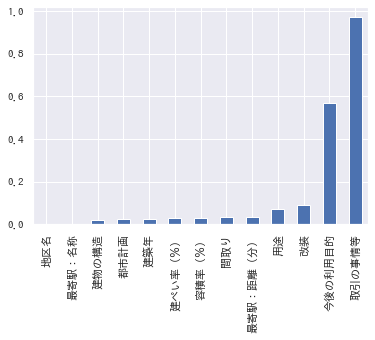

In [ ]:
%matplotlib inline

missing = train_df.isnull().sum()/len(train_df)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

In [ ]:
import pandas_profiling
# jp_font = {'fontname':'IPAGothic'}
pfr = pandas_profiling.ProfileReport(train_df)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 21306 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 30010 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 12467 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_H

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 20303 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 23429 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 12381 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.6/dist-packages/matplotlib/textpath.py:84: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_H

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(train_df.describe())

                 ID   地域  ...        容積率（％）  取引価格（総額）_log
count  3.422600e+04  0.0  ...  32570.000000  34226.000000
mean   2.079003e+06  NaN  ...    283.088118      7.001243
std    1.413162e+06  NaN  ...    113.571881      0.358433
min    1.000007e+06  NaN  ...     60.000000      4.176091
25%    1.022875e+06  NaN  ...    200.000000      6.799341
50%    1.055842e+06  NaN  ...    200.000000      7.079181
75%    4.006971e+06  NaN  ...    400.000000      7.255273
max    5.028545e+06  NaN  ...   1000.000000      8.255273

[8 rows x 12 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import sys

sys.setrecursionlimit(5000)

In [ ]:
!pip install pandas_profiling

In [ ]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
!apt-get -y install fonts-ipafont-mincho

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-mincho is already the newest version (00303-18ubuntu1).
fonts-ipafont-mincho set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
import matplotlib
print(matplotlib.get_cachedir())

/root/.cache/matplotlib


In [ ]:
!rm /root/.cache/matplotlib/fontList.json

rm: cannot remove '/root/.cache/matplotlib/fontList.json': No such file or directory


In [ ]:
!rm /root/.cache/matplotlib/fontlist-v310.json

In [ ]:
!ls -ll /root/.cache/matplotlib/

total 4
drwxr-xr-x 2 root root 4096 Jan 26 17:21 tex.cache


In [ ]:
!rm /root/.cache/matplotlib/fontList.json

rm: cannot remove '/root/.cache/matplotlib/fontList.json': No such file or directory


In [ ]:
! pip install pandas==0.25

  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: visions 0.6.0 has requirement pandas>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: pandas-profiling 2.10.0 has requirement pandas!=1.0.0,!=1.0.1,!=1.0.2,!=1.1.0,>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: fbprophet 0.7.1 has requirement pandas>=1.0.4, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


In [ ]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.5)


In [ ]:
!pip install --upgrade pandas_Profiling

Requirement already up-to-date: pandas_Profiling in /usr/local/lib/python3.6/dist-packages (2.10.0)


# 新しいセクション